# Importando as Bibliotecas

In [ ]:
#Importando as bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

# Importando o dataset de Câncer de mama

In [17]:
import pandas as pd
dataCancer = pd.read_csv("breast-cancer.csv")
dataCancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,1799.0,1038.0,122.8,1001.0,1184.0,2776,3001,1471,...,2538.0,1733.0,184.6,2019.0,1622,6656.0,7119.0,2654,4601.0,1189
1,842517,0,2057.0,1777.0,132.9,1326.0,8474.0,7864,869,7017,...,2499.0,2341.0,158.8,1956.0,1238,1866.0,2416.0,186,275.0,8902
2,84300903,0,1969.0,2125.0,130.0,1203.0,1096.0,1599,1974,1279,...,2357.0,2553.0,152.5,1709.0,1444,4245.0,4504.0,243,3613.0,8758
3,84348301,0,1142.0,2038.0,7758.0,386.1,1425.0,2839,2414,1052,...,1491.0,26.5,9887.0,567.7,2098,8663.0,6869.0,2575,6638.0,173
4,84358402,0,2029.0,1434.0,135.1,1297.0,1003.0,1328,198,1043,...,2254.0,1667.0,152.2,1575.0,1374,205.0,0.4,1625,2364.0,7678


In [19]:
dataCancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,0,1799.0,1038.0,122.8,1001.0,1184.0,2776,3001,1471,...,2538.0,1733.0,184.6,2019.0,1622,6656.0,7119.0,2654,4601.0,1189
1,842517,0,2057.0,1777.0,132.9,1326.0,8474.0,7864,869,7017,...,2499.0,2341.0,158.8,1956.0,1238,1866.0,2416.0,186,275.0,8902
2,84300903,0,1969.0,2125.0,130.0,1203.0,1096.0,1599,1974,1279,...,2357.0,2553.0,152.5,1709.0,1444,4245.0,4504.0,243,3613.0,8758
3,84348301,0,1142.0,2038.0,7758.0,386.1,1425.0,2839,2414,1052,...,1491.0,26.5,9887.0,567.7,2098,8663.0,6869.0,2575,6638.0,173
4,84358402,0,2029.0,1434.0,135.1,1297.0,1003.0,1328,198,1043,...,2254.0,1667.0,152.2,1575.0,1374,205.0,0.4,1625,2364.0,7678
5,843786,0,1245.0,15.7,8257.0,477.1,1278.0,17,1578,8089,...,1547.0,2375.0,103.4,741.6,1791,5249.0,5355.0,1741,3985.0,1244
6,844359,0,1825.0,1998.0,119.6,1040.0,9463.0,109,1127,74,...,2288.0,2766.0,153.2,1606.0,1442,2576.0,3784.0,1932,3063.0,8368
7,84458202,0,1371.0,2083.0,90.2,577.9,1189.0,1645,9366,5985,...,1706.0,2814.0,110.6,897.0,1654,3682.0,2678.0,1556,3196.0,1151
8,844981,0,13.0,2182.0,87.5,519.8,1273.0,1932,1859,9353,...,1549.0,3073.0,106.2,739.3,1703,5401.0,539.0,206,4378.0,1072
9,84501001,0,1246.0,2404.0,8397.0,475.9,1186.0,2396,2273,8543,...,1509.0,4068.0,9765.0,711.4,1853,1058.0,1105.0,221,4366.0,2075


# Encontrando informações do Dataset

In [7]:
dataCancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null int64
concavity_mean             569 non-null int64
concave points_mean        569 non-null int64
symmetry_mean              569 non-null int64
fractal_dimension_mean     569 non-null int64
radius_se                  569 non-null int64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null int64
compactness_se             569 non-null int64
concavity_se               569 non-null int64
conca

In [8]:
dataCancer.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
dataset.describe()

# Plotando um Gráfico

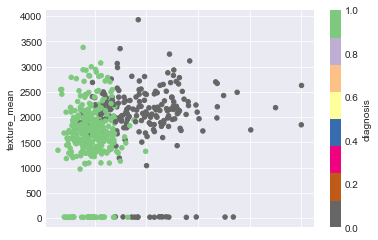

In [20]:
%matplotlib inline
from matplotlib import style
style.use("seaborn-darkgrid")
dataCancer.plot(x='area_mean', y='texture_mean', c='diagnosis', kind='scatter', colormap='Accent_r')



In [24]:
plt.style.available

[u'seaborn-darkgrid',
 u'Solarize_Light2',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'seaborn',
 u'seaborn-poster',
 u'seaborn-bright',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'fast',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn-dark-palette']

# Indicando a classe

In [21]:
classes = dataCancer['diagnosis']
dataCancer.drop('diagnosis', axis=1, inplace=True)

# Aplicando o Algoritmo SVM

In [36]:
# Importe as bibliotecas de Pipelines e Validações
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn import svm

In [37]:
radius_basis= Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

polynomial = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

linear = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

# Calculando Acurácia

In [42]:
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=3)
    return metrics.accuracy_score(y,resultados)

In [43]:
# Kernel rbf
Acuracia(radius_basis,dataCancer,classes)

0.9349736379613357

In [44]:
# Kernel Polynomial
Acuracia(polynomial,dataCancer,classes)

0.9173989455184535

In [45]:
# Kernel Linear
Acuracia(linear,dataCancer,classes)

0.9332161687170475